In [1]:
import os
os.chdir("C:/Users/pitak/Desktop/DigitalHuman-Speak")
import script.util.TextProcessingUtil as tpu
import script.util.VoiceProcessingUtil as vpu
import speech_recognition as sr
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
%matplotlib inline

ฉันจะพาเธอลอยล่องไปในอวกาศจะมีแต่เธอมีแต่เธอนักไม่ต้องกลัว


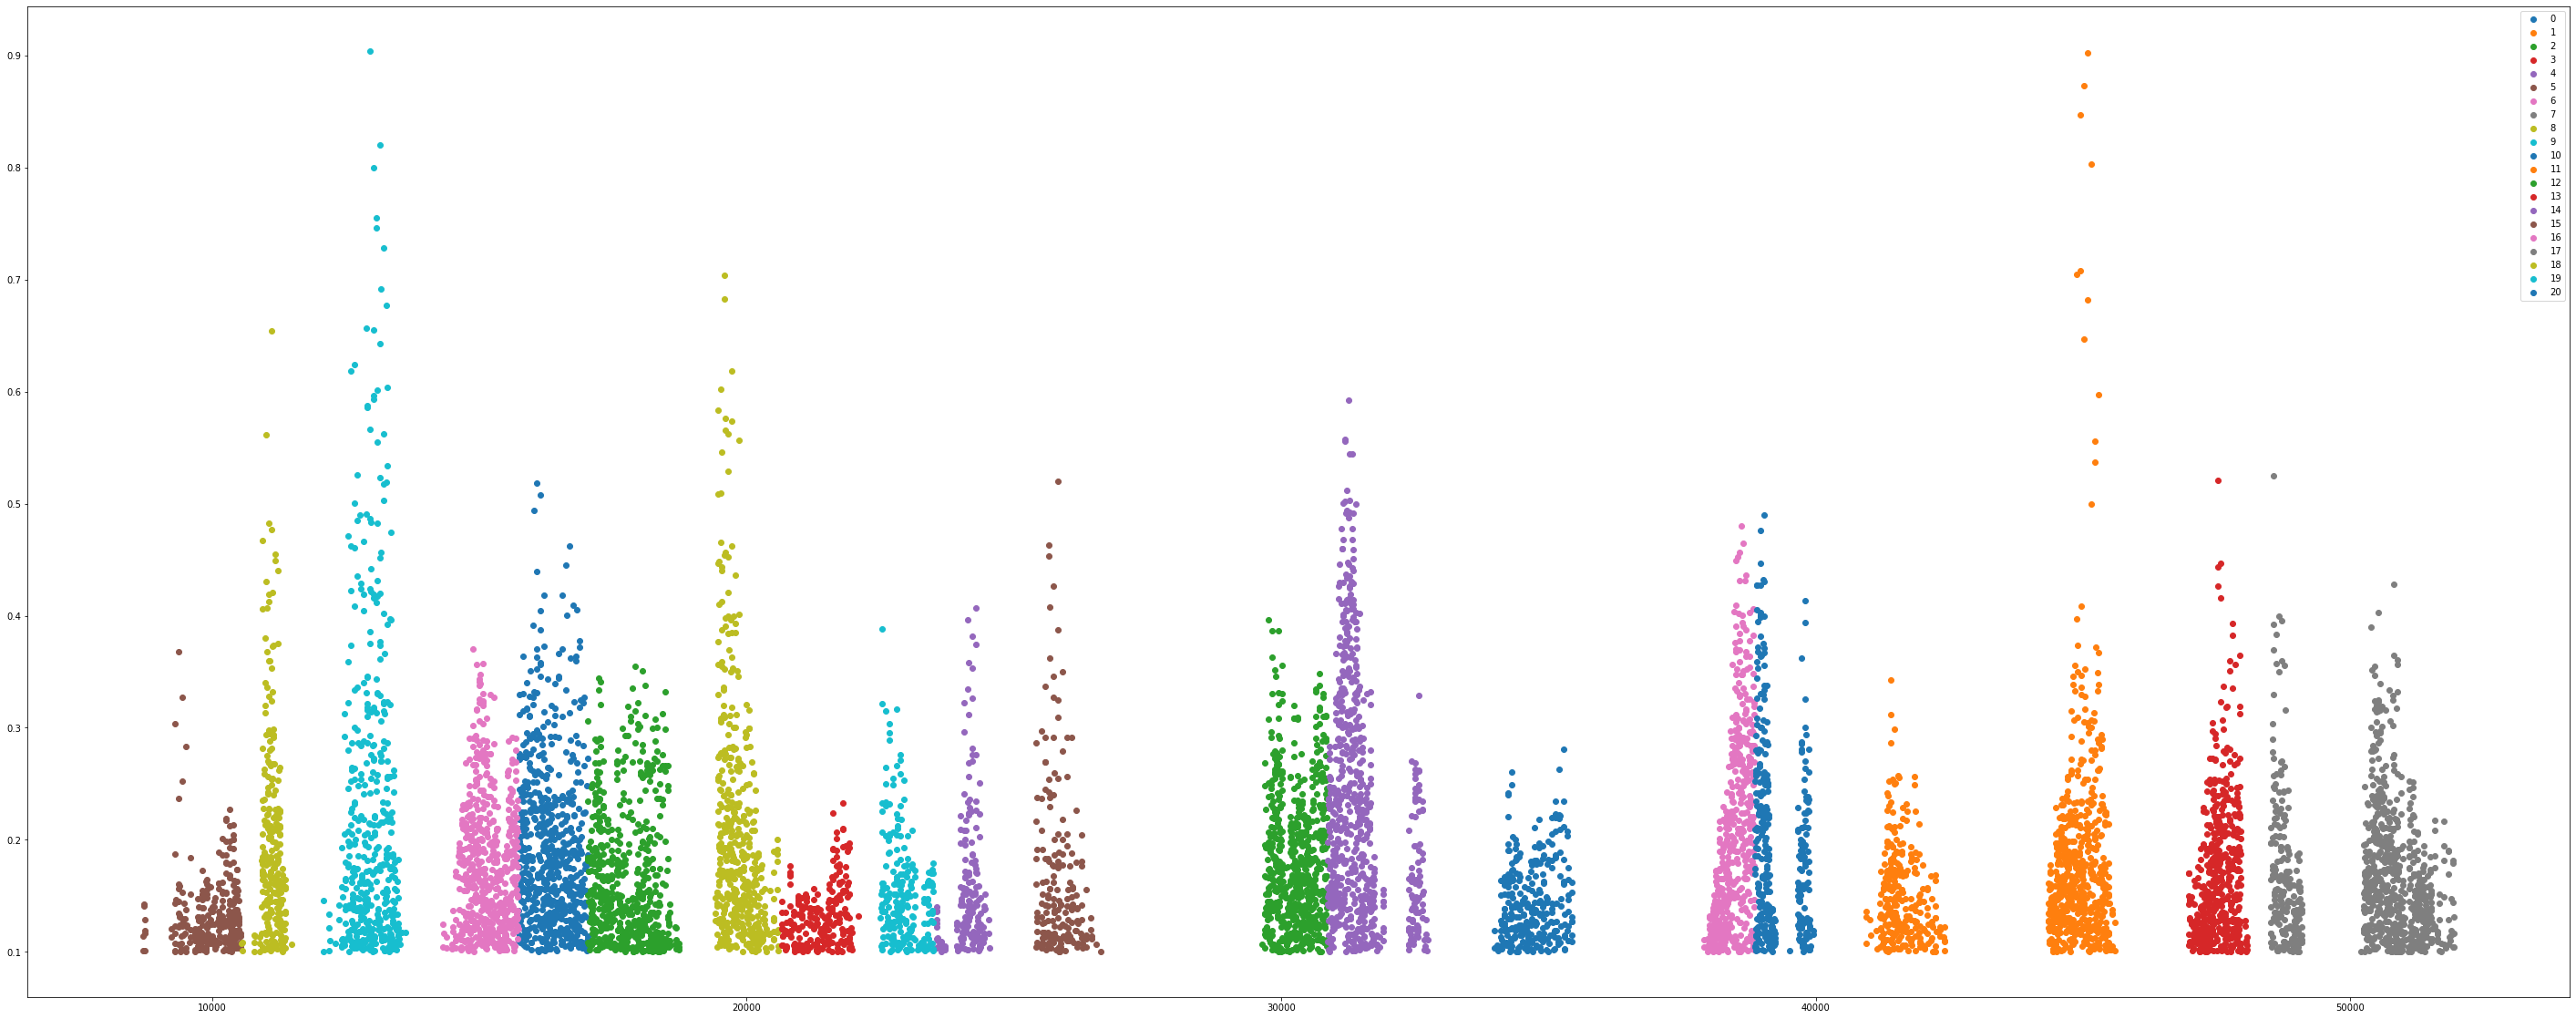

<Figure size 432x288 with 0 Axes>

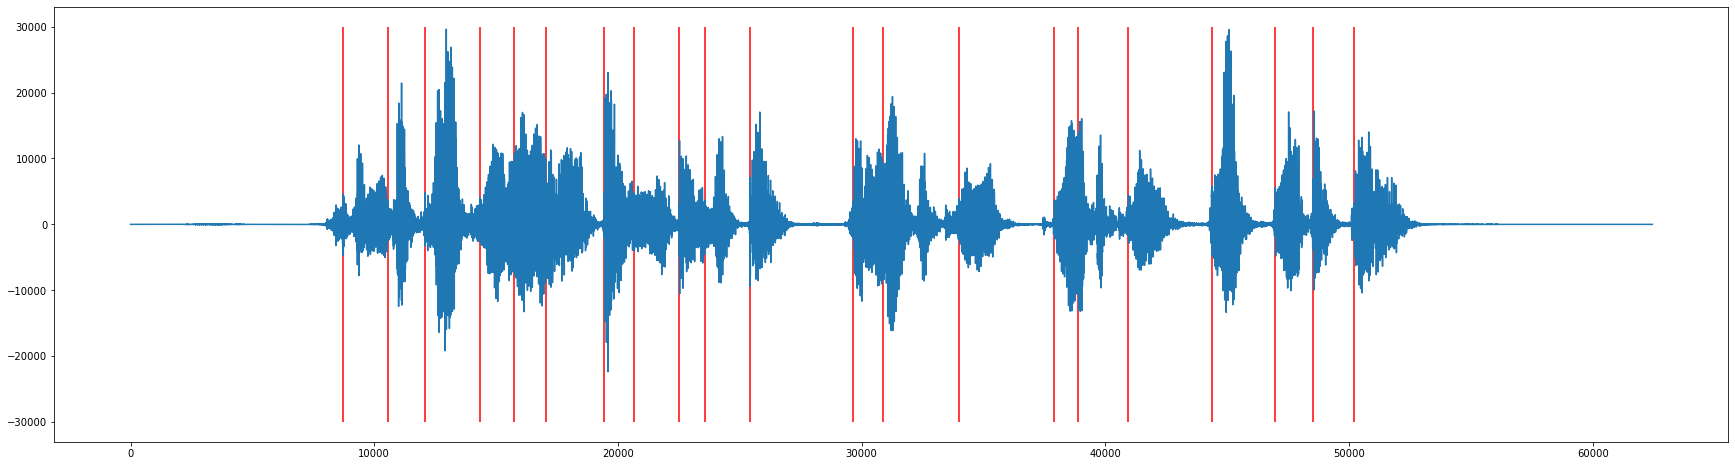

[[8713, 10541],
 [10562, 11499],
 [12082, 13618],
 [14328, 15727],
 [15739, 17028],
 [17032, 18740],
 [19423, 20600],
 [20656, 22088],
 [22506, 23498],
 [23555, 24546],
 [25414, 26632],
 [29652, 30861],
 [30875, 32738],
 [33985, 35446],
 [37910, 38862],
 [38864, 39959],
 [40948, 42407],
 [44357, 45593],
 [46973, 48069],
 [48508, 49098],
 [50209, 51946]]

<Figure size 432x288 with 0 Axes>

In [2]:
vpu.get_voice_syllables(from_file=True,audio_path="data/Test/dontworry.wav")

In [4]:
PATH = "data\Test\dontworry.wav"

In [128]:
data, Fs = librosa.load(PATH, sr=8000)

In [129]:
recog = sr.Recognizer()
speech = sr.AudioFile(PATH)
with speech as source:
    audio = recog.listen(source)
text = recog.recognize_google(audio,language='th')
print(text)

ฉันจะพาเธอลอยล่องไปในอวกาศจะมีแต่เธอมีแต่เธอนักไม่ต้องกลัว


In [130]:
syls = tpu.get_text_syllables(text=text)
syls

['ฉัน',
 'จะ',
 'พา',
 'เธอ',
 'ลอย',
 'ล่อง',
 'ไป',
 'ใน',
 'อว',
 'กาศ',
 'จะ',
 'มี',
 'แต่',
 'เธอ',
 'มี',
 'แต่',
 'เธอ',
 'นัก',
 'ไม่',
 'ต้อง',
 'กลัว']

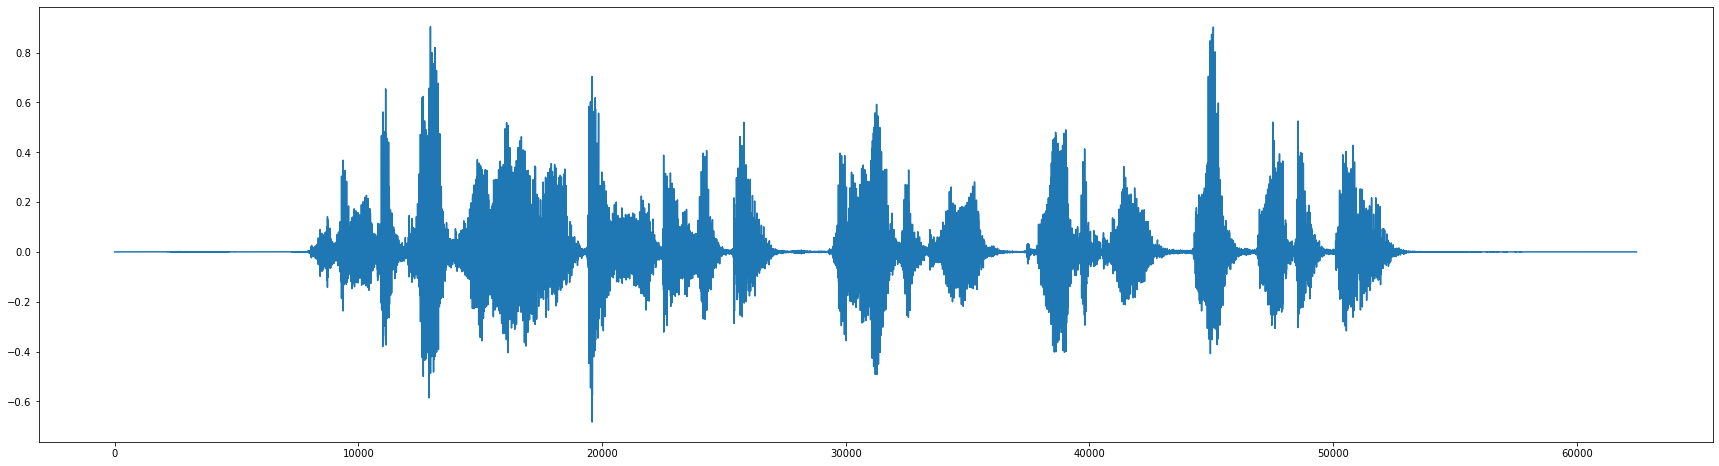

In [131]:
plt.figure(figsize=(30,8))
plt.plot(data)
plt.show()

In [132]:
cut = 0.0
newdata = [i if (i > cut) else 0 for i in abs(data)]

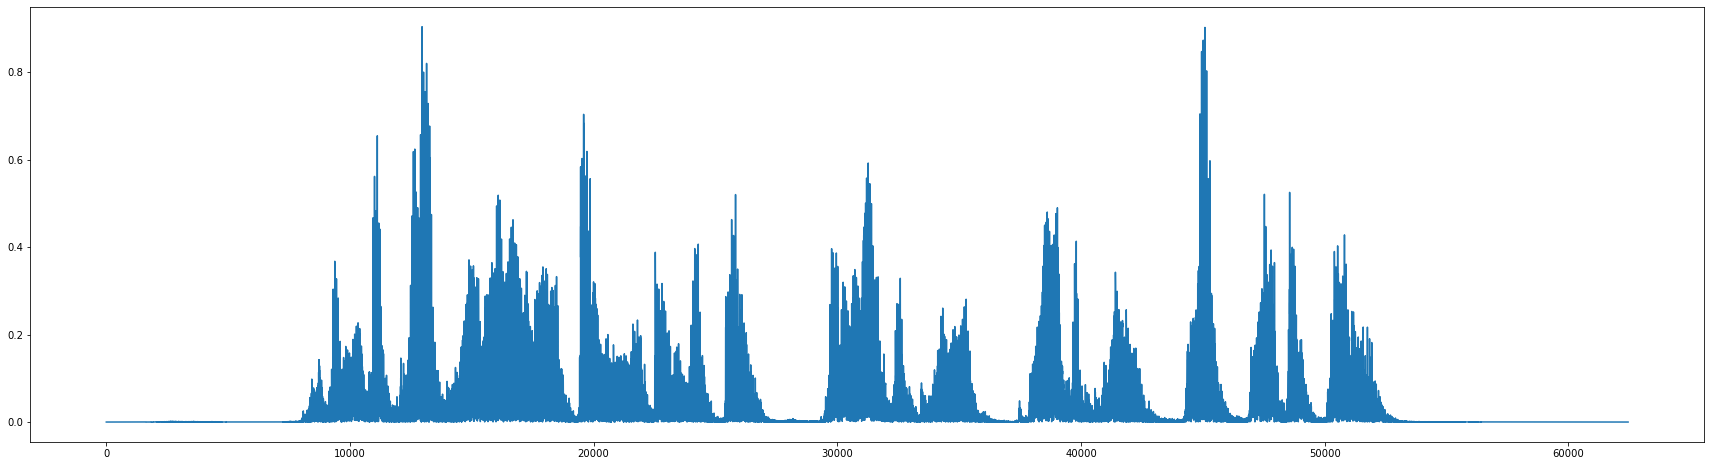

In [133]:
plt.figure(figsize=(30,8))
plt.plot(newdata)
plt.show()

In [187]:
cluster_data = []
for i in range(len(newdata)):
    if newdata[i] > 0.1:
        cluster_data.append([i,newdata[i]])
cluster_data  = np.array(cluster_data)
cluster_data

array([[8.71300000e+03, 1.00982666e-01],
       [8.71400000e+03, 1.13830566e-01],
       [8.73100000e+03, 1.42639160e-01],
       ...,
       [5.19440000e+04, 1.04064941e-01],
       [5.19450000e+04, 1.31378174e-01],
       [5.19460000e+04, 1.16943359e-01]])

In [188]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters=len(syls), 
    n_init=20,
    max_iter=6900,
    random_state=690,
    )
label = model.fit_predict(cluster_data)

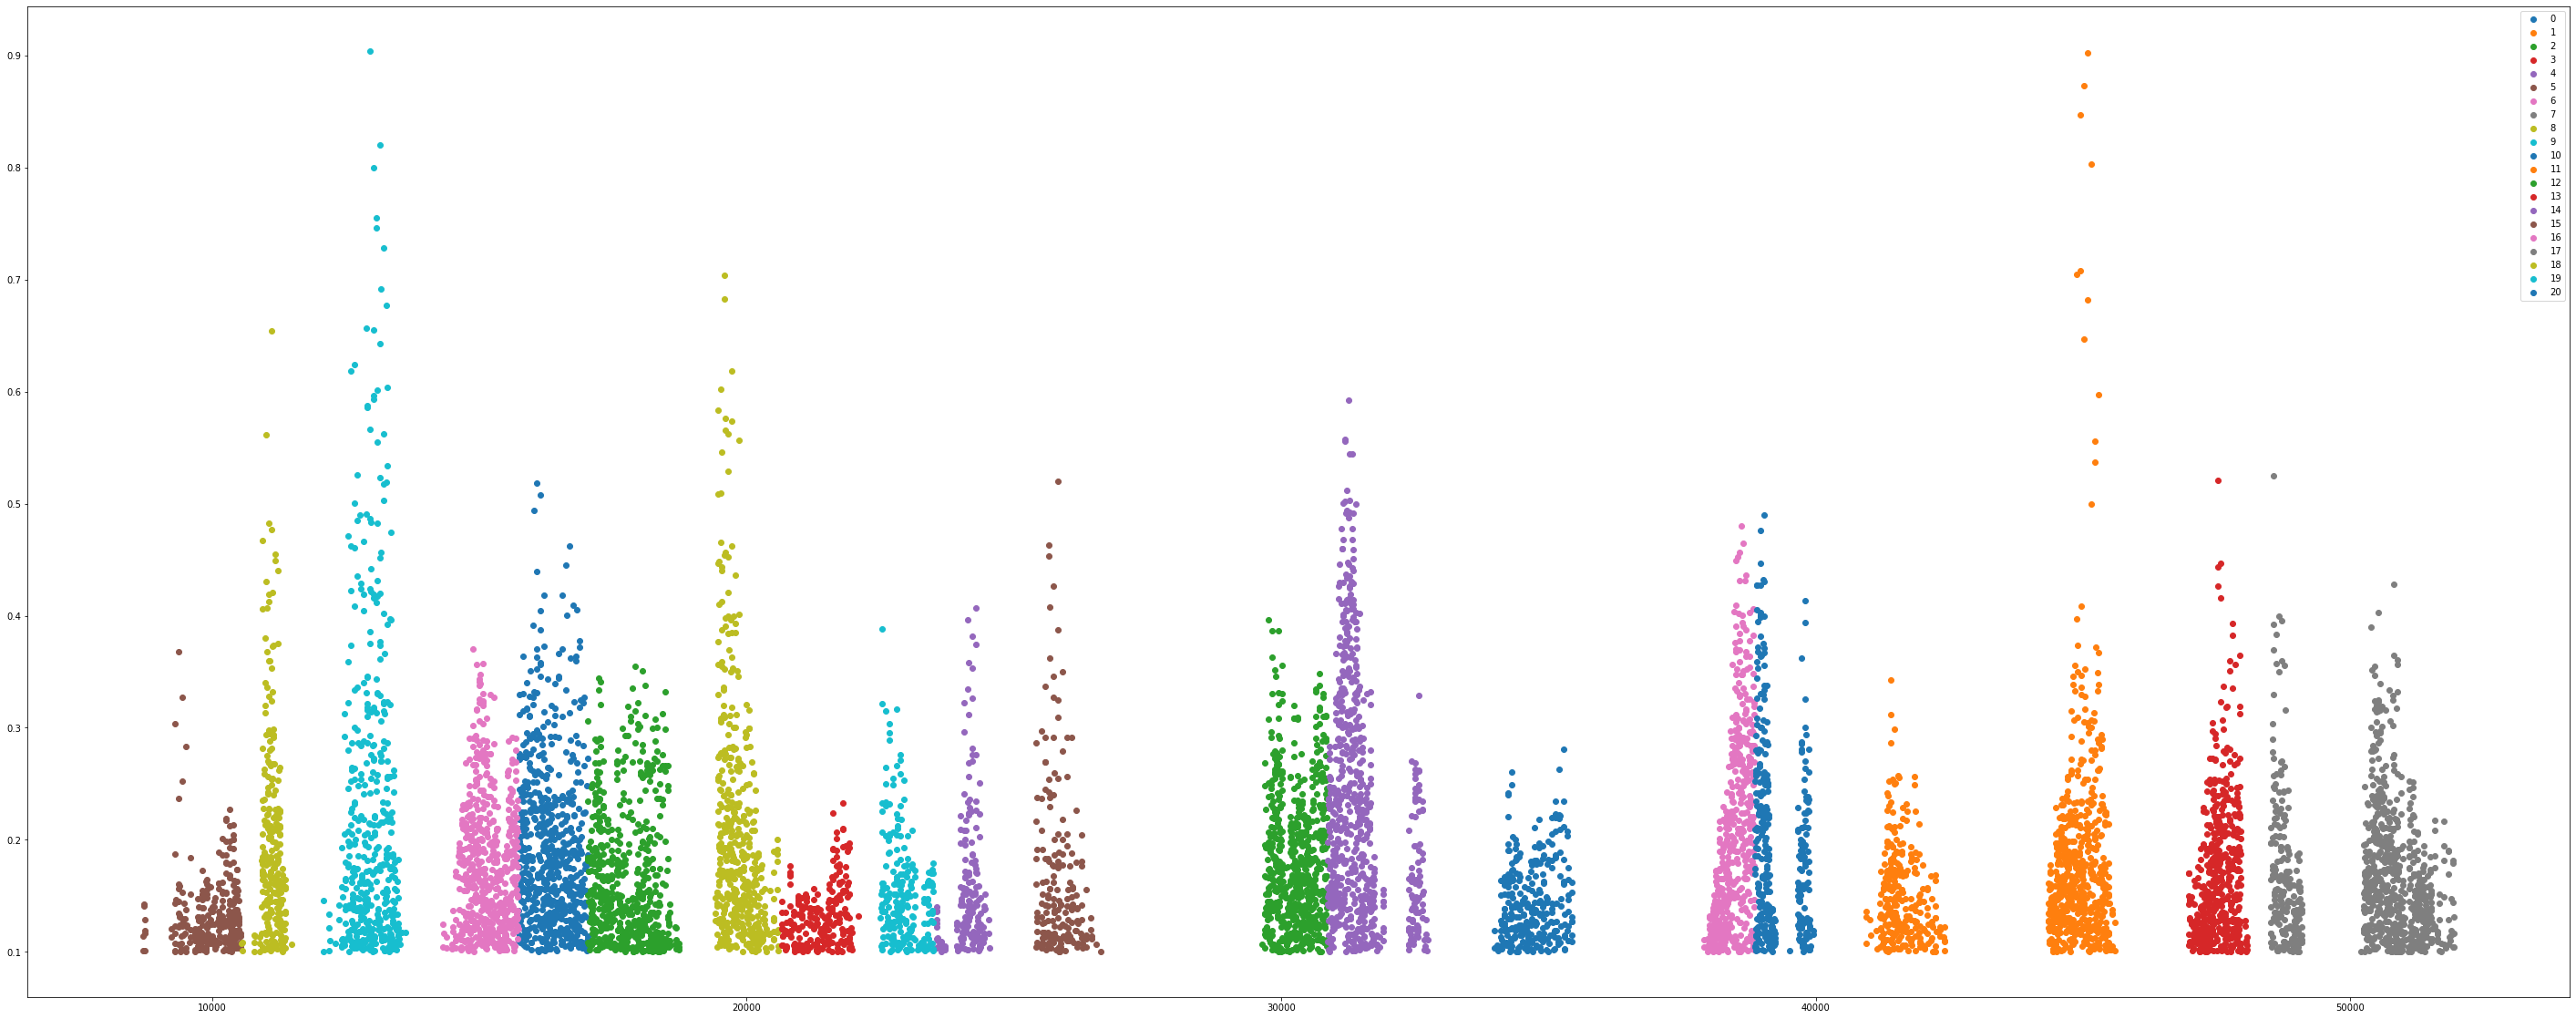

In [189]:
u_labels = np.unique(label)
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [196]:
from hdbscan import HDBSCAN
model = HDBSCAN(min_cluster_size=50,min_samples=None,algorithm="best")
label = model.fit_predict(cluster_data)

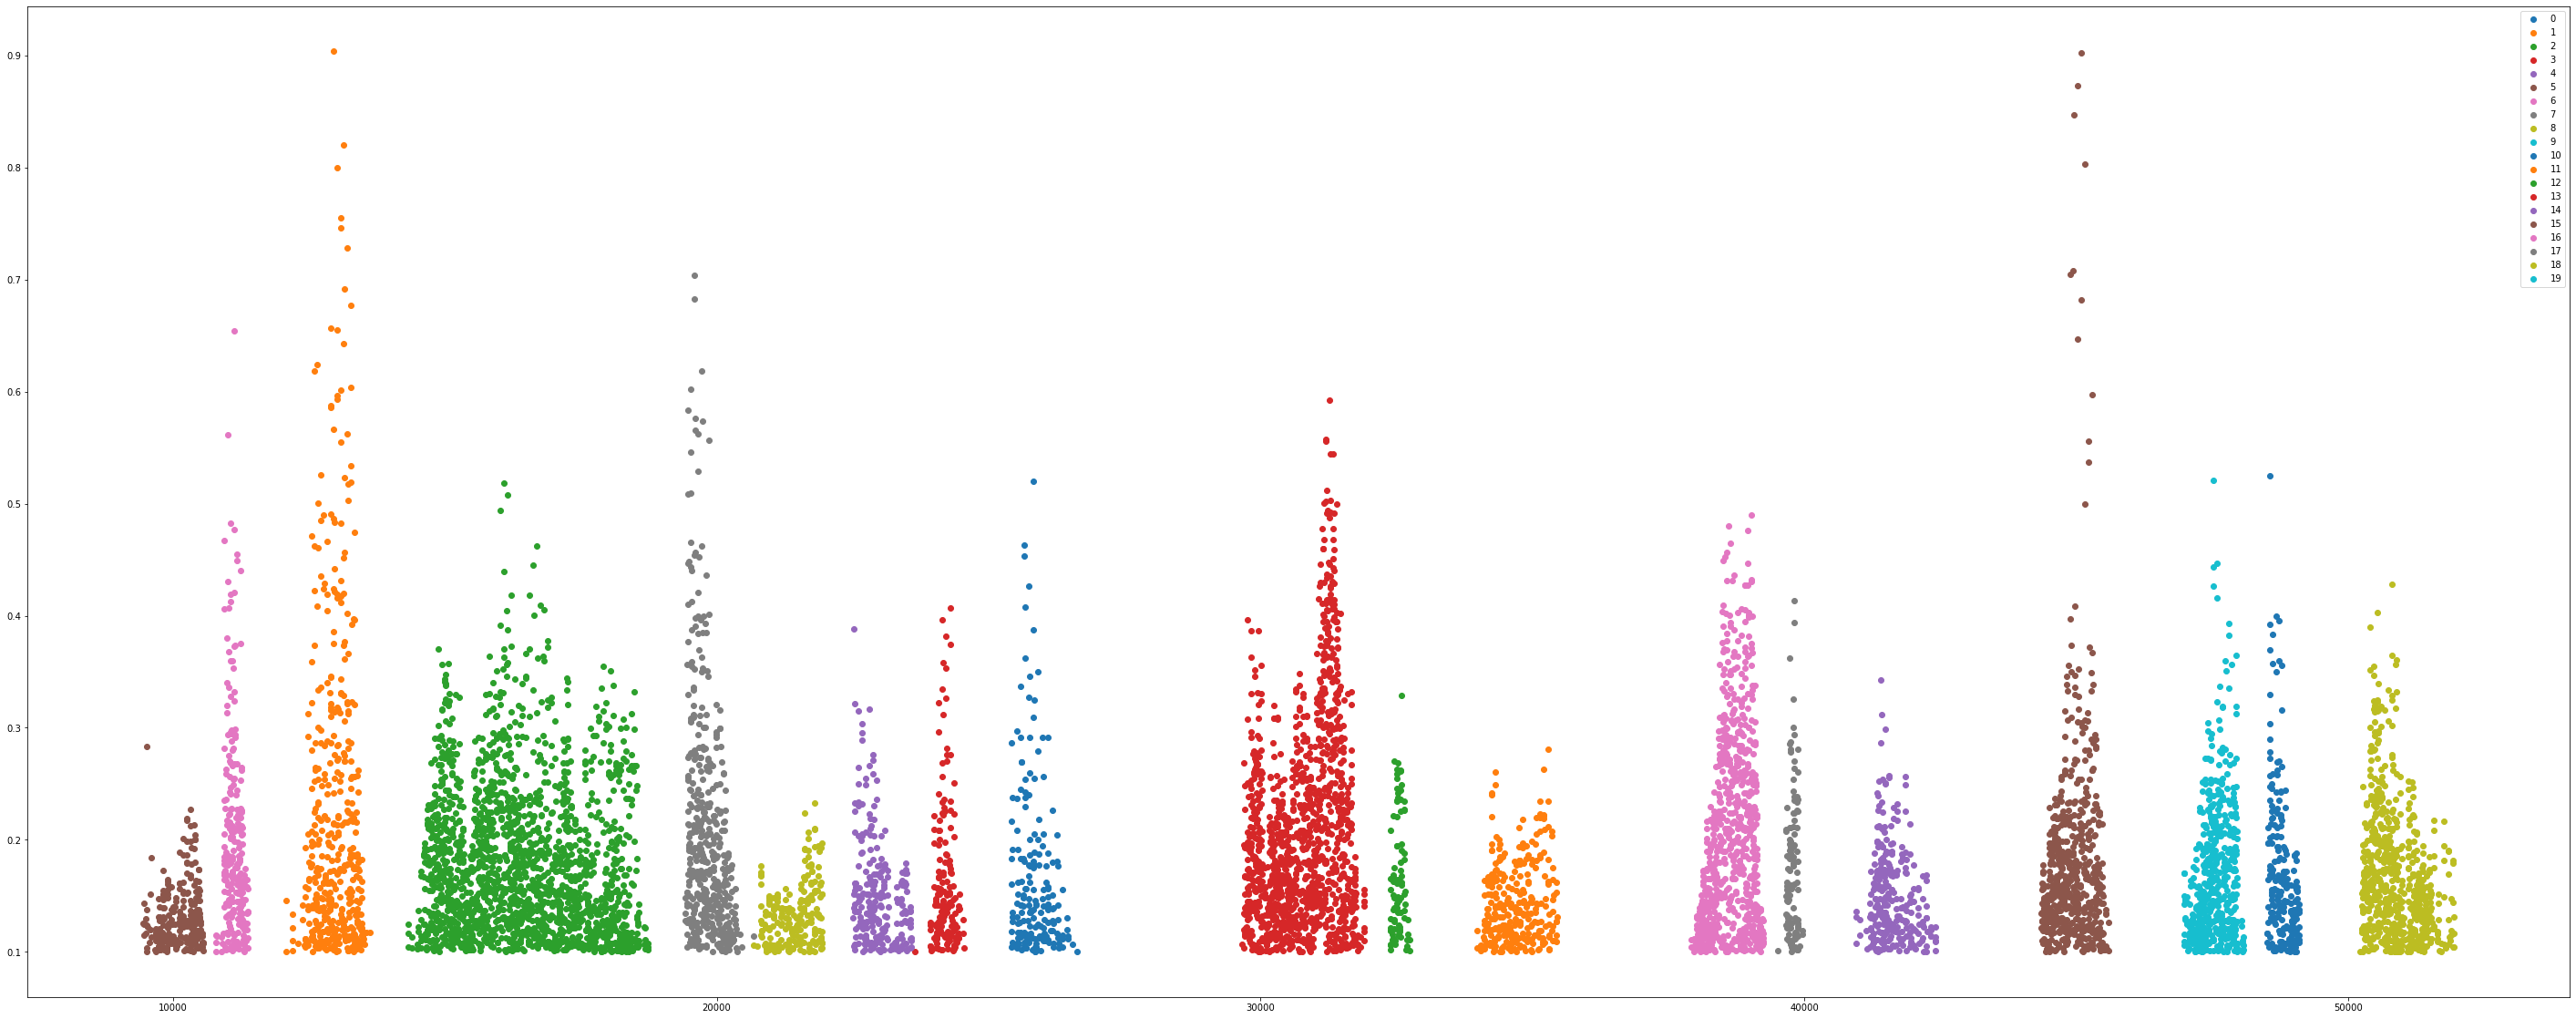

In [197]:
u_labels = np.unique(label)-[-1]
plt.figure(figsize=(50,20))
for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [198]:
u_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [206]:
cluster_data[label == 19 ,0]

array([], dtype=float64)

In [208]:
clusters = []
for i in u_labels:
    if(len(cluster_data[label == i]) > 0):
        clusters.append([int(cluster_data[label == i , 0].min()),int(cluster_data[label == i , 0].max())])
clusters = sorted(clusters)
clusters

[[9453, 10564],
 [10791, 11376],
 [12082, 13618],
 [14328, 18740],
 [19423, 20674],
 [20676, 21935],
 [22506, 23575],
 [23641, 24546],
 [25414, 26632],
 [29652, 31910],
 [32381, 32738],
 [33985, 35446],
 [37910, 39237],
 [39514, 39959],
 [40948, 42407],
 [44357, 45593],
 [46973, 48069],
 [48508, 49098],
 [50209, 51946]]

In [209]:
evaFs,evawav = wav.read(PATH)

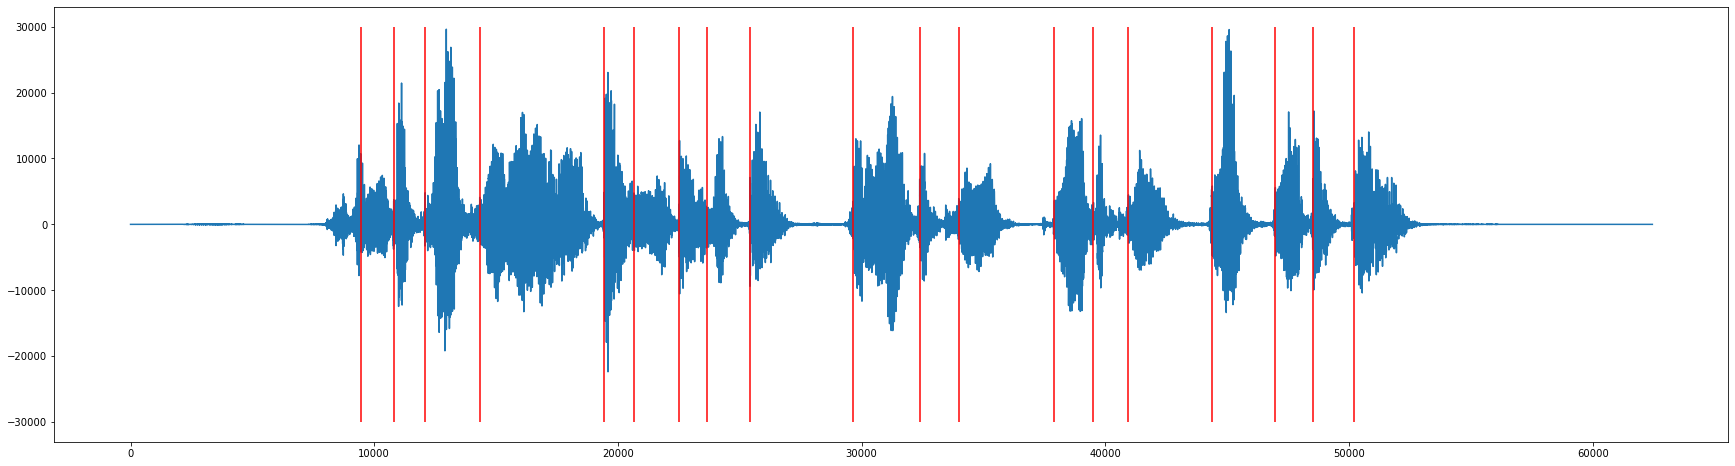

<Figure size 432x288 with 0 Axes>

In [211]:
plt.figure(figsize=(30,8))
plt.plot(evawav,zorder=1)
plt.vlines(
    list(map(lambda e: int(e[0]*(evaFs/Fs)),clusters)),
    ymin=30000,
    ymax=-30000,
    colors="r",
    zorder=2)
plt.show()
plt.savefig("wave_segmentation.png")

In [ ]:
c = clusters[0]
e = clusters[14]
wav.write("d.wav",evaFs,evawav[c[0]*int(evaFs/Fs):e[1]*int(evaFs/Fs)])